In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Выравнивание ридов RNA-Seq

In [ ]:
# создаем индекс референса

!hisat2-build data/HW7/ref.fa data/HW7/index

In [5]:
# выравниваем

!hisat2 --threads 8 -x data/HW7/index -1 data/HW7/SRR453566_1.fastq.gz -2 data/HW7/SRR453566_2.fastq.gz > data/HW7/aln.sam

5725730 reads; of these:
  5725730 (100.00%) were paired; of these:
    1190833 (20.80%) aligned concordantly 0 times
    4291336 (74.95%) aligned concordantly exactly 1 time
    243561 (4.25%) aligned concordantly >1 times
    ----
    1190833 pairs aligned concordantly 0 times; of these:
      136484 (11.46%) aligned discordantly 1 time
    ----
    1054349 pairs aligned 0 times concordantly or discordantly; of these:
      2108698 mates make up the pairs; of these:
        1419215 (67.30%) aligned 0 times
        637773 (30.24%) aligned exactly 1 time
        51710 (2.45%) aligned >1 times
87.61% overall alignment rate


In [6]:
# превращаем выравнивание в bam файл и сортируем

!samtools view -S -b data/HW7/aln.sam > data/HW7/aln.bam
!samtools sort data/HW7/aln.bam -o data/HW7/aln.sorted.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...


# 2. Оценка количества экспрессирующихся генов

In [7]:
!featureCounts -p -t 'gene' -a data/HW7/genes.gtf.gz -o data/HW7/counts.txt data/HW7/aln.sorted.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           o aln.sorted.bam                                 ||
||                                                                            ||
||             Output file : counts.txt                                       ||
||                 Summary : counts.txt.summary                  

In [13]:
counts = pd.read_csv('data/HW7/counts.txt', skiprows=1, sep='\t')
col_names = list(counts.columns)
col_names[-1] = 'counts'
counts.columns = col_names
counts.head()

,Geneid,Chr,Start,End,Strand,Length,counts
0,YDL248W,IV,1802,2953,+,1152,324
1,YDL247W-A,IV,3762,3836,+,75,9
2,YDL247W,IV,5985,7814,+,1830,10
3,YDL246C,IV,8683,9756,-,1074,7
4,YDL245C,IV,11657,13360,-,1704,21


In [14]:
# рассчитываем TPM

counts['RPK'] = counts.counts / (counts.Length / 1000)
scale = counts.RPK.sum() / 1000000
counts['TPM'] = counts['RPK'] / scale
counts.head()

,Geneid,Chr,Start,End,Strand,Length,counts,RPK,TPM
0,YDL248W,IV,1802,2953,+,1152,324,281.250000,55.672520
1,YDL247W-A,IV,3762,3836,+,75,9,120.000000,23.753609
2,YDL247W,IV,5985,7814,+,1830,10,5.464481,1.081676
3,YDL246C,IV,8683,9756,-,1074,7,6.517691,1.290156
4,YDL245C,IV,11657,13360,-,1704,21,12.323944,2.439484


<AxesSubplot:>

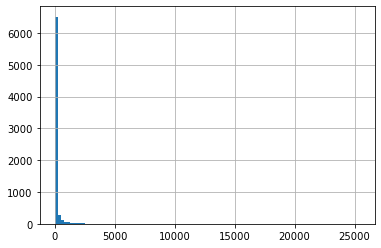

In [20]:
counts.TPM.hist(bins=100)

In [23]:
# выберем трешхолд по TPM > 1

counts[counts.TPM > 1].shape[0] / counts.shape[0]

0.8832444569183272

In [24]:
# посчитаем покрытие

!bedtools genomecov -ibam data/HW7/aln.sorted.bam -d > data/HW7/coverage.tsv

In [35]:
cov = pd.read_csv('data/HW7/coverage.tsv', sep='\t', header=None)
cov.columns = ['Chr', 'Pos', 'Cov']
cov.sample(10)

,Chr,Pos,Cov
8441104,XIII,32121,10
6772442,XI,108452,281
10674450,XV,556703,99
3588764,V,171143,64
4941920,VII,677264,81
6125548,X,207309,82
7838025,XII,507219,564
2998350,IX,106396,67
11794374,XVI,585336,62
6787612,XI,123622,62


In [45]:
cov_i = cov.copy()
# cov_i = cov_i.set_index(['Chr', 'Pos'])
cov_i.head()

,Chr,Pos,Cov
0,I,1,0
1,I,2,0
2,I,3,0
3,I,4,0
4,I,5,0


In [50]:
g_cov = []

# for i, row in 
counts.shape

# for i, row in counts.iterrows():
#     g = cov_i[(cov_i.Chr == row.Chr) & (cov_i.Pos >= row.Start) & (cov_i.Pos <= row.End)]
#     g_cov.append(g[g.Cov > 0].shape[0] / g.shape[0])

(7126, 9)